*Analysis* - monitoring file

In [180]:
with open("/content/data_monitoring_baseline.txt") as fp:
  lines = fp.readlines()

linesclear = list()
ttr = 0
ttf = 0
disponibilidade = list()
ttfs = list()
ttrs = list()

for line in lines:
  linesclear.append(line.strip())

for i in range(len(linesclear)-1):
  if linesclear[i] == 'UP':
    ttf = ttf+1
  if linesclear[i] == 'DOWN':
    ttr = ttr+1

  if ttf !=0 and ttr !=0 and linesclear[i+1] == 'UP':
    ttf = ttf*100
    ttfs.append(ttf)
    ttrs.append(ttr)
    ttr = 0
    ttf = 0

#print(disponibilidade, len(disponibilidade), a)
print(len(ttfs), len(ttrs))
print(ttfs)
print(ttrs)
#print(ttfs + ttrs)
a = sum(ttfs)/(sum(ttfs)+sum(ttrs))
print(a)

27 27
[21600, 7100, 78100, 11600, 112000, 41900, 1000, 19600, 800, 135400, 189100, 2200, 58500, 1300, 40400, 52900, 150300, 156200, 75200, 17800, 14000, 16400, 4000, 47200, 22200, 10000, 2200]
[177, 171, 184, 10, 383, 208, 99, 372, 198, 36, 243, 386, 68, 132, 291, 144, 20, 43, 18, 399, 133, 30, 61, 70, 63, 181, 354]
0.9965410978496668


Distribution - TTFS


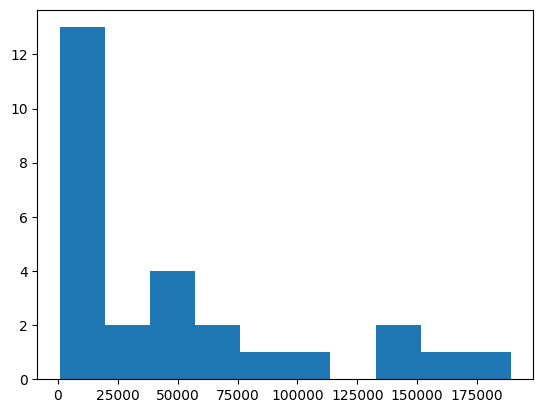

In [181]:
import numpy as np
import matplotlib.pyplot as plt

print("Distribution - TTFS")
plt.hist(ttfs, bins=10);

Distribution - TTRS


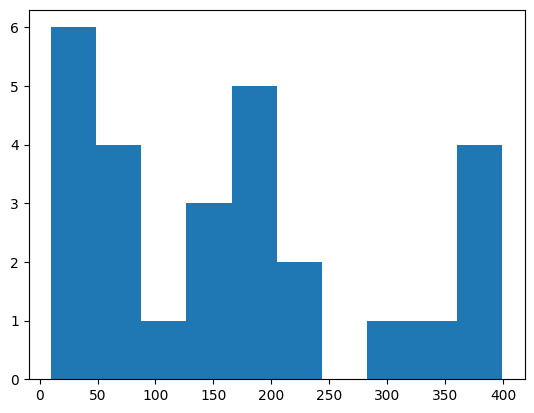

In [182]:
print("Distribution - TTRS")
plt.hist(ttrs, bins=10);

Bootstrap

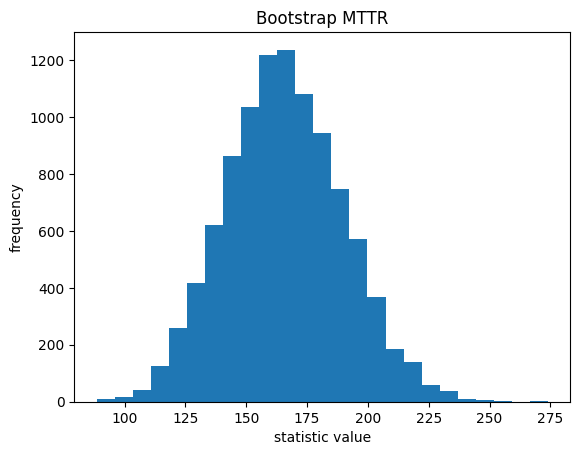

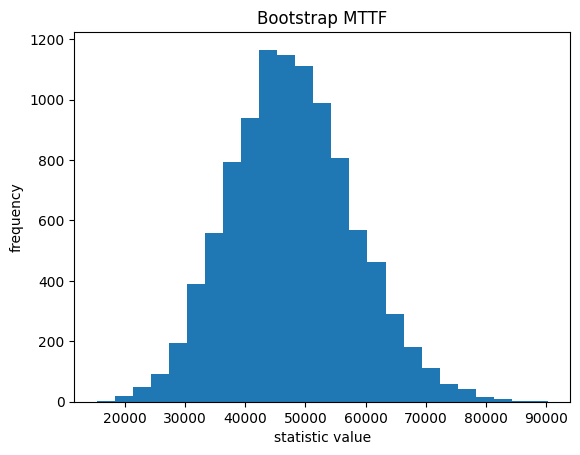

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
dis = list
rng = np.random.default_rng()

res_mttr = bootstrap((ttrs,), np.mean, confidence_level=0.95, random_state=rng, n_resamples=10000)

res_mttf = bootstrap((ttfs,), np.mean, confidence_level=0.95, random_state=rng, n_resamples=10000)

fig, ax = plt.subplots()
ax.hist(res_mttr.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap MTTR')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()


fig, ax = plt.subplots()
ax.hist(res_mttf.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap MTTF')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()



```
# Isto está formatado como código
```

Confidence Interval - MTTF e MTTR

In [184]:
print("MTTF", res_mttf.confidence_interval)

print("MTTR", res_mttr.confidence_interval)

MTTF ConfidenceInterval(low=30651.85185185185, high=71900.95345684077)
MTTR ConfidenceInterval(low=122.91469489221676, high=218.6028592390383)


Confidence Interval

In [185]:
availability_lower = res_mttf.confidence_interval.low/(res_mttf.confidence_interval.low + res_mttr.confidence_interval.low)
availability_upper = res_mttf.confidence_interval.high/(res_mttf.confidence_interval.high + res_mttr.confidence_interval.high)

print(availability_lower, availability_upper)

0.9960059909892243 0.9969688823613811
